In [3]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

#import warnings
#warnings.filterwarnings('ignore')
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
def load_data(in_path, name):
    df = pd.read_csv(in_path)
    #print(f"{name}: shape is {df.shape}")
    #print(df.info())
    #display(df.head(5))
    return df

DATA_DIR = "C:/Users/Owner/Documents/Class/DataViz/Final/data/rosters"
datasets={}

In [8]:
ds_name = 'pre_roster_2009'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

In [9]:
datasets['pre_roster_2009'].shape

(92, 7)

In [31]:
pre_roster_2009 = load_data(os.path.join(DATA_DIR, f'pre_roster_2009.csv'), 'pre_roster_2009')
pre_roster_2009['Made_Roster'] = 0

reg_roster_2009 = load_data(os.path.join(DATA_DIR, f'reg_roster_2009.csv'), 'reg_roster_2009')
reg_roster_2009['Made_Roster'] = 1

roster_2009 = reg_roster_2009.append(pre_roster_2009)

In [32]:
roster_2009.head()

,season,season_type,full_player_name,abbr_player_name,team,position,gsis_id,Made_Roster
0,2009,reg,Aaron Brown,A.Brown,DET,RB,00-0027129,1
1,2009,reg,Aaron Rodgers,A.Rodgers,GB,QB,00-0023459,1
2,2009,reg,Aaron Stecker,A.Stecker,ATL,RB,00-0015601,1
3,2009,reg,Adrian Peterson,A.Peterson,CHI,RB,00-0021306,1
4,2009,reg,Adrian Peterson,A.Peterson,MIN,RB,00-0025394,1


In [74]:
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [111]:
roster_all = roster_2009.copy()

for ii in years:
    pre_name = 'pre_roster_' + str(ii)
    pre_df = load_data(os.path.join(DATA_DIR, f'{pre_name}.csv'), pre_name)
    print(pre_df.shape)
    
    reg_name = 'reg_roster_' + str(ii)
    reg_df = load_data(os.path.join(DATA_DIR, f'{reg_name}.csv'), reg_name)
    
    roster_df = pre_df.assign(Made_Roster=pre_df.gsis_id.isin(reg_df.gsis_id).astype(int))
    
    roster_all = roster_all.append(roster_df)
    print(roster_all.shape)
    
roster_all = roster_all.drop(['season_type'], axis=1)

(604, 7)
(1198, 8)
(676, 7)
(1874, 8)
(663, 7)
(2537, 8)
(657, 7)
(3194, 8)
(673, 7)
(3867, 8)
(638, 7)
(4505, 8)
(667, 7)
(5172, 8)
(684, 7)
(5856, 8)
(733, 7)
(6589, 8)
(747, 7)
(7336, 8)


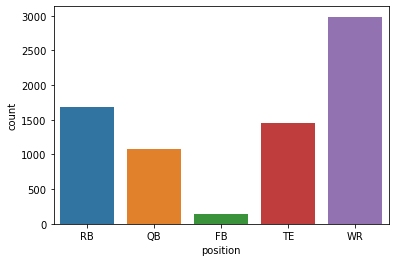

In [112]:
sns.countplot(x="position", data=roster_all);

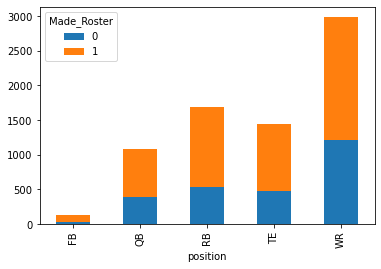

In [113]:
roster_all.groupby(['position', 'Made_Roster']).size().unstack().plot(kind='bar', stacked=True)

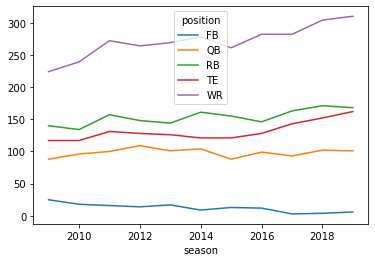

In [114]:
roster_all.groupby(['season', 'position']).size().unstack().plot(kind='line')

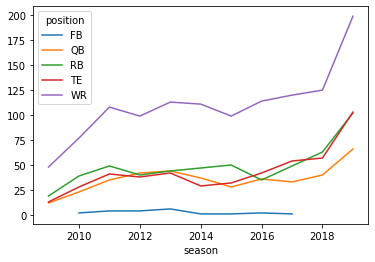

In [116]:
roster_all[roster_all['Made_Roster'] == 0].groupby(['season', 'position']).size().unstack().plot(kind='line')

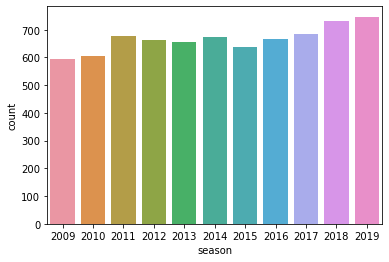

In [121]:
sns.countplot(x="season", data=roster_all);

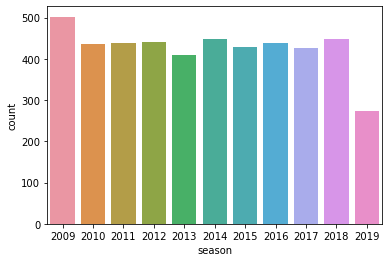

In [122]:
sns.countplot(x="season", data=roster_all[roster_all['Made_Roster'] == 1]);